<a href="https://colab.research.google.com/github/rahiakela/deep-learning-research-and-practice/blob/main/math-and-architectures-of-deep-learning/introduction-to-vectors-matrices-and-tensors/04_matrix_diagonalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Matrix Diagonalization

Consider a $n \times n$ matrix $A_{n, n}$ with $n$ linearly independent eigenvectors.

Let $S_{n,n}$ be a matrix with these eigenvectors as its columns.

$$Ae_1 = \lambda_1e_1$$
$$Ae_2 = \lambda_2e_2$$
$$... = ...$$
$$Ae_n = \lambda_ne_n$$

And,

$$
S = 
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
$$

Then,

$$
AS = 
A \begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
=
\begin{bmatrix}
        Ae_1 & Ae_2 & ... & Ae_n \\
\end{bmatrix}
=
\begin{bmatrix}
        \lambda_1e_1 & \lambda_2e_2 & ... & \lambda_ne_n \\
\end{bmatrix}
=
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
\begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}
=S\Sigma
$$

Where,

$$
\Sigma = \begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}
$$

is a diagonal matrix with the eigenvalues of $A$ on the diagonal and 0 everywhere else.

Thus, we have

$$AS = S\Sigma$$

Which lead to,

$$A=S\Sigma S^{-1}$$

and,

$$\Sigma = S^{-1}AS$$

If $A$ is symmetric, then its eigenvectors are orthogonal. Then

$$S^TS = SS^T = I$$

So, 

$$S^{-1}=S^T$$

and we get the diagonalization of $A$.

$$
A = S \Sigma S^T
$$

##Setup

In [1]:
import torch
import torch.linalg as LA

import numpy as np
import math
from math import cos, sin, radians
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [2]:
torch.manual_seed(42)

##Numpy matrix diagonalization

Let us reconsider our rotation matrix.

In [ ]:
def diagonalise(matrix):
  """
  np.linalg.eig(matrix) returns the eigenvalues of matrix in an array (first return value) 
  and the eigvectors as a matrix (each column is an eigenvector)
  """
  try:
    l, e = torch.linalg.eig(matrix)
    # make a diagonal matrix from the eigenvalues
    sigma = torch.diag(l)
    # return the three factor matrices
    return e, torch.diag(l), torch.linalg.inv(e)
  except RuntimeError:
    print("Cannot diagonalise matrix!")

In [ ]:
A = torch.tensor([
  [0.7071, 0.7071, 0],
  [-0.7071, 0.7071, 0],
  [0, 0, 1]
])
print(f"A: \n{A}")

S, sigma, S_inv = diagonalise(A)

# Let us reconstruct the original matriox from its factors
A1 = torch.matmul(S, torch.matmul(sigma, S_inv))
print(f"\nS =\n{S}")
print(f"\nsigma =\n{sigma}")
print(f"\nS_inv =\n{S_inv}")
print(f"\nS sigmaa S_inv =\n{A1}")

A: 
tensor([[ 0.7071,  0.7071,  0.0000],
        [-0.7071,  0.7071,  0.0000],
        [ 0.0000,  0.0000,  1.0000]])

S =
tensor([[0.7071+0.0000j, 0.7071-0.0000j, 0.0000+0.0000j],
        [0.0000+0.7071j, 0.0000-0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000-0.0000j, 1.0000+0.0000j]])

sigma =
tensor([[0.7071+0.7071j, 0.0000+0.0000j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.7071-0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 1.0000+0.0000j]])

S_inv =
tensor([[0.7071+0.0000j, 0.0000-0.7071j, 0.0000-0.0000j],
        [0.7071+0.0000j, 0.0000+0.7071j, 0.0000+0.0000j],
        [0.0000+0.0000j, 0.0000+0.0000j, 1.0000+0.0000j]])

S sigmaa S_inv =
tensor([[ 0.7071+5.9605e-08j,  0.7071+5.9605e-08j,  0.0000+0.0000e+00j],
        [-0.7071+5.9605e-08j,  0.7071-5.9605e-08j,  0.0000+0.0000e+00j],
        [ 0.0000+0.0000e+00j,  0.0000+0.0000e+00j,  1.0000+0.0000e+00j]])


We assert that the original matrix is the same as the reconstruction from the diagonal decomposition factors.

In [ ]:
assert torch.allclose(A, A1.real)

##Linear Systems with Diagonalization

In general,
matrix inversion (i.e., computation of $A^{-1}$ is a very complex process which is numerically
unstable. 

Hence, solving $Ax = b$ via $x = A^{-1}b$ is to be avoided when possible.

In the particular case of a square symmetric matrix with n distinct eigenvalues, diagonalization can come to the rescue. 

We can solve in multiple steps: 

We first diagonalize $A$

$$
A = S\Lambda S^T
$$

Then,

$$Ax=b$$

can be written as:

$$A = S\Lambda S^Tx=b$$

where $S$ is the matrix with eigenvectors of $A$ as its columns:

$$
S = 
\begin{bmatrix}
        e_1 & e_2 & ... & e_n \\
\end{bmatrix}
$$

Since $A$ is symmetric, these eigenvectors are orthogonal. Hence $S^TS=SS^T=I$.

The solution can be obtained in a series of very simple steps as shown below:

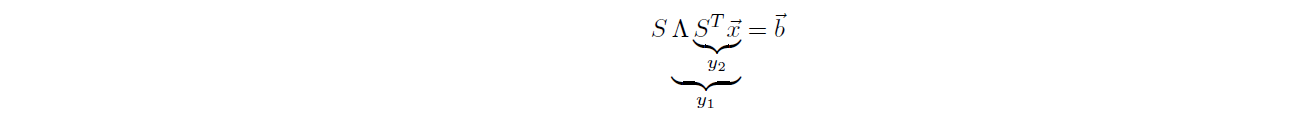


Let's first solve,

$$Sy_1=b$$

as

$$y1=S^Tb$$

Notice that both transpose and matrix vector multiplications are simple and numerically
stable operations unlike matrix inversion. 

Then we get,

$$\Lambda (S^Tx) = y_1$$

Now solve,

$$\Lambda y_2 = y_1$$

as

$$y_2 = \Lambda^{-1} y_1$$

Note that since $\Lambda$ is a diagonal matrix, inverting it is trivial,

$$
\begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}^{-1}
=
\begin{bmatrix}
        \frac{1}{\lambda_1} & 0 & ... & 0 \\
        0 & \frac{1}{\lambda_2} & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \frac{1}{\lambda_n} \\
\end{bmatrix}
$$

As final step, solve,

$$S^Tx=y_2$$

as

$$x=Sy_2$$

Thus we have obtained $x$ without a single complex or unstable step.

Now, let us try solving the following set of equations:

\begin{align*}
    x + 2y + z    &= 8 \\
    2x + 2y + 3z &= 15 \\
    x + 3y + 3z  &= 16
\end{align*}

This can be written using matrices and vectors as
\begin{equation*}
A\vec{x} = \vec{b}
\end{equation*}
where $A=
\begin{bmatrix}
        1 & 2 & 1 \\
        2 & 2 & 3 \\
        1 & 3 & 3 
\end{bmatrix}
\;\;\;\;\;\;
\vec{x} = 
\begin{bmatrix}
        x \\
        y \\
        z 
\end{bmatrix}
\;\;\;\;\;\;
\vec{b} = 
\begin{bmatrix}
        8 \\
        15 \\
        16
\end{bmatrix}$


Note that $A$ is a symmetric matrix. It has orthogonal eigenvectros.
<br> The matrix with eigenvectors of $A$ in columns is orthogonal.
<br> Its transpose and inverse are same.

In [ ]:
A = np.array([
  [1, 2, 1],
  [2, 2, 3],
  [1, 3, 3]
])

# since it is symmetric matrix
assert np.all(A == A.T)

b = np.array([8, 15, 16])

# One way to solve for this is to compute matrix inverse i.e x = A_inv b
x_0 = np.matmul(np.linalg.inv(A), b)
print(f"Solution using inverse: {x_0}")

# Matrix inversion is a complex process that can be
# numerically unstable. If possible we use diagonalisation.
w, S = np.linalg.eig(A)

# We know that A = S sigma S_inv, so S sigma S_inv x = b
# sigma S_inv x =  S_inv b  ==> sigma S_inv x = S_t b
S_inv_b = np.matmul(S.T, b)

# => S_inv x = sigma_inv(S_t b)
# Since inversion of the diagonal matrix is just division of all elements by 1, we can compute sigma_inv as follows
sigma_inv = np.diag(1/w)
sigma_inv_S_inv_b = np.matmul(sigma_inv, S_inv_b)

# => x = S (sigma_inv(S_t b))
x_1 = np.matmul(S, sigma_inv_S_inv_b)
print(f"Solution using diagonalisation: {x_1}")

assert np.allclose(x_0, x_1)

Solution using inverse: [1. 2. 3.]
Solution using diagonalisation: [1. 2. 3.]


##Matrix powers using diagonalization

If matrix $A$ can be diagonalized then,

$$A = S\Lambda S^{-1}$$

$$
A^2 = S\Lambda S^{-1} S\Lambda S^{-1}
=
A = S\Lambda I \Lambda S^{-1}=A = S\Lambda^2 S^{-1}
$$

$$A^n = ... = ... = S\Lambda^n S^{-1}$$

For a diagonal matrix:

$$
\begin{bmatrix}
        \lambda_1 & 0 & ... & 0 \\
        0 & \lambda_2 & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n \\
\end{bmatrix}
$$

The $n^{th}$ power is simply,

$$
\Lambda^n= 
\begin{bmatrix}
        \lambda_1^n & 0 & ... & 0 \\
        0 & \lambda_2^n & ... & 0 \\
        ... & ... & ... \\
        ... & ... & ... \\
        0 & 0 & ... & \lambda_n^n \\
\end{bmatrix}
$$


If one needs to compute various powers of a `m x m` matrix A at various times, one
should pre-compute the matrix S and compute any power with only $O(m)$ operations - compared to $(nm^3)$ operations necessary for naive computations.

In [3]:
A = torch.tensor([
  [1, 2, 1],
  [2, 2, 3],
  [1, 3, 3]
], dtype=torch.float)

def brute_force_matrix_power(matrix, y):
  """Returns matrix raised to the power of y"""
  # Assert that it is a square matrix
  assert len(matrix.shape) == 2 and matrix.shape[0] == matrix.shape[1]
  assert type(y) == int

  if y == 0:
    # Return identity matrix 
    return torch.eye(matrix.shape[0])
  output_matrix = torch.clone(matrix)

  for i in range(y - 1):
    output_matrix = torch.matmul(matrix, output_matrix)
  return output_matrix

In [4]:
def matrix_power_using_diag(matrix, y):
  """Returns matrix raised to the power of y"""
  # Assert that it is a square matrix
  assert len(matrix.shape) == 2 and matrix.shape[0] == matrix.shape[1]
  assert type(y) == int

  if y == 0:
    # Return identity matrix 
    return torch.eye(matrix.shape[0])

  w, v = torch.linalg.eig(matrix)
  # Compute w^y
  w_y = w ** float(y)

  return torch.matmul(v, torch.matmul(torch.diag(w_y), torch.linalg.inv(v)))

In [5]:
# One way to compute A**2 would be to multiply A by A
# This is an O(nm^3) operation
A_2_brute_force = brute_force_matrix_power(A, 2)

# We can instead diagonalise the matrix and compute A ** 2
# This reduces the complexity to O(m)
A_2_diag = matrix_power_using_diag(A, 2)

print(f"A:\n{A}")
print(f"A**2 computed via brute force:\n{A_2_brute_force}")
print(f"A**2 computed via diagonalisation:\n{A_2_diag}")

# We assert that A**2 computed via brute force and diagonalisation is identical
assert torch.allclose(A_2_brute_force, A_2_diag.real)

A:
tensor([[1., 2., 1.],
        [2., 2., 3.],
        [1., 3., 3.]])
A**2 computed via brute force:
tensor([[ 6.,  9., 10.],
        [ 9., 17., 17.],
        [10., 17., 19.]])
A**2 computed via diagonalisation:
tensor([[ 6.0000+0.j,  9.0000+0.j, 10.0000+0.j],
        [ 9.0000+0.j, 17.0000+0.j, 17.0000+0.j],
        [10.0000+0.j, 17.0000+0.j, 19.0000+0.j]])
